In [1]:
library(readxl)
library(data.table)
library(ggplot2)
library(ggprism)
library(ggforce)
library(ggetho)
library(ggsignif)
source("library.R", local = T)
theme_set(theme_prism(base_size=20))
options(repr.plot.width=15, repr.plot.height=15)

Loading required package: behavr



In [2]:
sheets <- c("20min STM", "1hr STM", "2hr STM", "3hr STM")
stm_experiments <-  c("20min STM", "1hr STM", "2hr STM", "3hr STM", "20min dunc")
data_clean_long <- data.table::fread(file = "tidy_data.csv")


In [3]:
data_clean_long$test <- factor(data_clean_long$test, levels=c("PRE", "POST"))
data_clean_long$interval <- factor(data_clean_long$interval, levels=c("ZT05-ZT11", "ZT12-ZT18", "ZT05-ZT24", "NONE"))
data_clean_long$experiment <- factor(data_clean_long$experiment, levels=c(sheets, "LTM", "LTM CHX"))

In [4]:
panel3_data <- data_clean_long[(substr(experiment, 1, 3)=="LTM" | (Genotype == "orb2" & experiment == "20min STM")) & interval == "NONE", ]
zt_light_phase <- paste0("ZT", seq(4, 10.5, 0.5))
zt_dark_phase <- paste0("ZT", seq(12, 23.5, 0.5))
panel3_data$asleep_total <- apply(panel3_data, MARGIN = 1, function(x) sum(as.numeric(x[zt_light_phase]), na.rm=TRUE)) * 30

In [5]:
panel3_data[Genotype=="orb2", table(experiment)]

experiment
20min STM   1hr STM   2hr STM   3hr STM       LTM   LTM CHX 
       22         0         0         0        34         0 

In [6]:
# panel3_data<-panel3_data[Genotype != "MB010B.(II)SPARC-Chrimson ISO",]
panel3_data<-panel3_data[Genotype == "MB010B.(II)SPARC-Chrimson ISO", Genotype := "Iso31"]

In [7]:
panel3_data<-panel3_data[order(interval, test),]

In [8]:
panel3_data$experiment <- factor(panel3_data$experiment, levels = c("20min STM", "LTM", "LTM CHX"))

In [9]:
panel3_data<-panel3_data[(Training_session == "6X_Spaced" | (Genotype == "orb2" & experiment == "20min STM")),]

In [10]:
panel3_data[Genotype=="orb2", table(experiment)]

experiment
20min STM       LTM   LTM CHX 
       22        34         0 

In [11]:
# panel3_data[Genotype == "MB010B.(II)SPARC-Chrimson ISO", Genotype :=  "Iso31"]
# panel3_data[,experiment := paste0(Genotype, " ", experiment)]

In [12]:
panel3_data[, table(User)]

User
AOJ  CH  ET 
 10 294  40 

In [13]:
panel3_data[, table(Genotype)]

Genotype
Iso31  orb2 
  288    56 

[1] -1.20  1.25


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message in geom_signif(data = annotation_df, aes(annotations = stars), xmin = 1, :
“Ignoring unknown aesthetics: annotations”


$gg

$n_facets
[1] 4

$direction
[1] "horizontal"


png 
  2

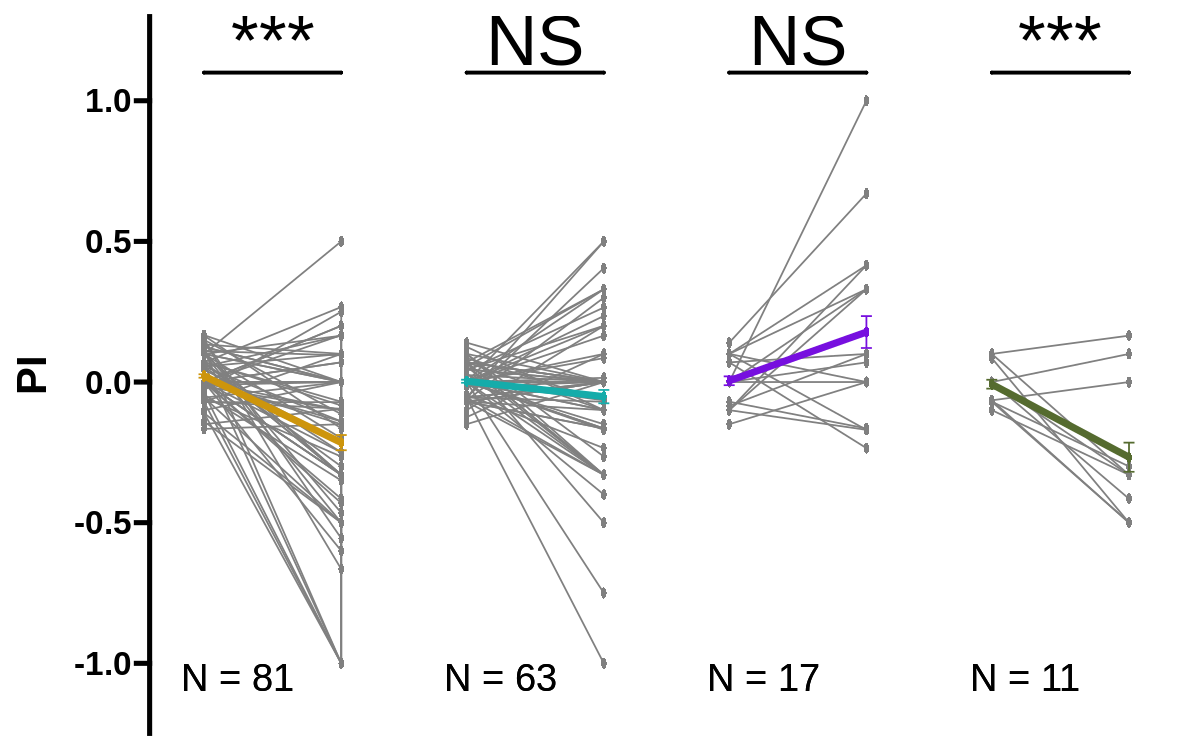

In [14]:
size_unit=2.5
ratio=2.5
panel3_data[, group := paste0(experiment, "_", Genotype)]
labels <- c("LTM_Iso31"="LTM", "LTM CHX_Iso31"="LTM+CHX", "LTM_orb2"="LTM orb2", "20min STM_orb2"="20min STM orb2")
panel3_data$group <- factor(unname(labels[as.character(panel3_data$group)]), levels=unname(labels))
panel3A <- learning_plot(
    data=panel3_data, "group",
    textsize=8,
    hjust_text = 0.2,
    y_annotation=1.1,
    y_limits=c(-1.2, 1.25),
    colors=colors_panel3)
options(repr.plot.width=size_unit*panel3A$n_facets, repr.plot.height=size_unit*ratio)
panel3A
save_learning_plot(plot=panel3A, filename = "figures/panel3A.svg", size_unit = size_unit, ratio = ratio)

In [15]:
# panel3_data[test=="POST", mean(PI), by=group]

In [16]:
panel3_data[test=="POST", .(.N/2, mean(PI)), by=.(User, group)]

User,group,V1,V2
<chr>,<fct>,<dbl>,<dbl>
ET,LTM,10.0,-0.16525397
AOJ,LTM,2.5,0.03285714
CH,LTM,28.0,-0.25544643
CH,LTM+CHX,31.5,-0.05182540
CH,20min STM orb2,5.5,-0.26727273
CH,LTM orb2,8.5,0.17764706


In [17]:
summ_statistics <- panel3_data[test=="POST", .(PI=mean(PI), stderror=sd(PI)/sqrt(.N)), by=experiment]

Warning message:
“Removed 3 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 3 rows containing non-finite values (`stat_signif()`).”
Warning message:
“Removed 3 rows containing non-finite values (`stat_signif()`).”


$gg

$n_facets
[1] 3


Warning message:
“Removed 3 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 3 rows containing non-finite values (`stat_signif()`).”
Warning message:
“Removed 3 rows containing non-finite values (`stat_signif()`).”


png 
  2

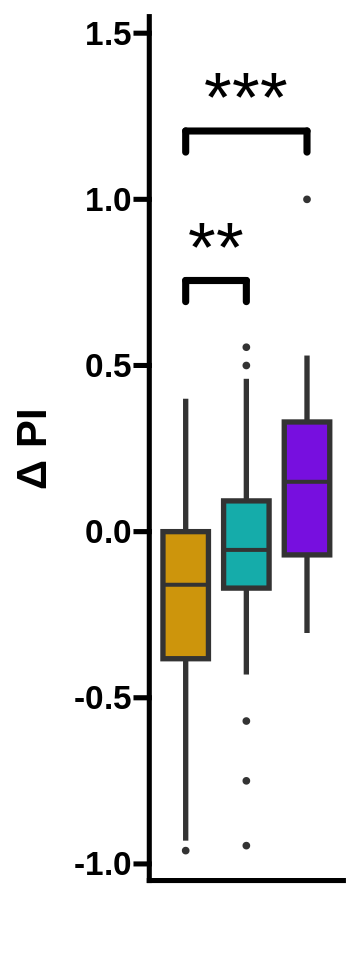

In [18]:
size_unit=1
ratio=8

panel3B <-summary_plot(
    data=panel3_data[group != "20min STM orb2",], "group",
    comparisons=list(c("LTM", "LTM+CHX"), c("LTM", "LTM orb2")),
    annotation_y=c(0.65, 1.1),
    y_limits=c(-1, 1.5),
    test=unpaired_t_test,
    colors=colors_panel3[1:3]
)
panel3B$gg <- panel3B$gg + theme(

    axis.text.x=element_blank(),
    axis.ticks.x=element_blank()
    
)
options(repr.plot.width=panel3B$n_facets*size_unit, repr.plot.height=size_unit*ratio)
panel3B
save_summ_plot(plot=panel3B, filename = "figures/panel3B.svg", ratio=ratio, size_unit = size_unit)